# **WRESTLING DATA ANALYSIS**

# **Importing the Packages**

In [ ]:
import pandas as pd
import numpy as np
import sklearn.metrics
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.neural_network import MLPRegressor
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings('ignore')

# **Data Collection and Analysis**
Wrestling Dataset

In [ ]:
# loading the diabetes dataset to a pandas DataFrame
df = pd.read_csv("/content/data.csv")


In [ ]:
# printing the first 5 rows of the dataset
df.head()

,id,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,0.0,Aaron Peavy,Female,41.0,165.0,England,82.0,"Boxing, MMA",3.0,7.0,8.0,7.0,Fight Zone Wrestling,1989.0,42.0
1,1.0,Abe Rutland,Male,36.0,185.0,Japan,100.0,Judo,0.0,8.0,5.0,9.0,World Wrestling Entertainment,2006.0,161.0
2,2.0,Adrian Quinn,Male,29.0,178.5,Japan,93.0,Karate,4.0,8.0,8.0,7.0,World Wrestling Entertainment,2012.0,153.0
3,3.0,Alan Beckham,Male,39.0,187.5,Japan,107.0,Judo,3.0,7.0,6.0,8.0,Fight Zone Wrestling,2003.0,252.0
4,4.0,Albertha Rodriguez,Female,29.0,158.0,USA,72.0,MMA,1.0,5.0,7.0,7.0,Consejo Global de Lucha Libre,2012.0,360.0


In [ ]:
# number of rows and Columns in this dataset
df.shape

(505, 15)

In [ ]:
# getting the statistical measures of the data
df.describe()

,id,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,251.500000,31.123016,174.865079,89.577381,3.055556,6.162698,7.148810,6.738095,2007.200397,248.529762
std,145.636534,5.432831,9.457220,11.142399,1.374610,1.569249,1.451563,1.199261,6.350085,145.585727
min,0.000000,18.000000,152.000000,65.000000,0.000000,2.000000,3.000000,3.000000,1986.000000,1.000000
25%,125.750000,27.000000,167.500000,81.000000,2.000000,5.000000,6.000000,6.000000,2003.000000,122.750000
50%,251.500000,31.000000,174.000000,89.000000,3.000000,6.000000,7.000000,7.000000,2007.000000,248.500000
75%,377.250000,35.000000,181.625000,98.000000,4.000000,7.000000,8.000000,8.000000,2012.000000,374.250000
max,503.000000,53.000000,202.000000,123.000000,8.000000,10.000000,10.000000,10.000000,2021.000000,500.000000


# **Checking for missing values**

In [ ]:
#Check for any null values
df.isnull().sum()

id               1
name             1
gender           1
age              1
height           1
nationality      1
weight           1
sports           1
hours_per_day    1
strength         1
agility          1
mental           1
federation       1
year_start       1
rank             1
dtype: int64

<Axes: >

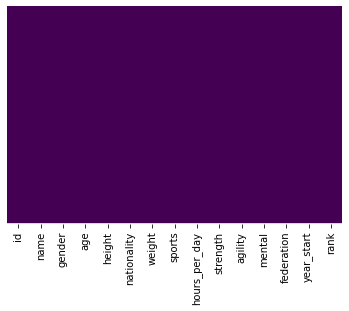

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
# Remove missing values
df.dropna(inplace=True)

# Convert categorical features
encoder = LabelEncoder()
df["gender"] = encoder.fit_transform(df["gender"])
df["nationality"] = encoder.fit_transform(df["nationality"])
df["sports"] = encoder.fit_transform(df["sports"])
df["federation"] = encoder.fit_transform(df["federation"])

In [ ]:
df["federation"] = encoder.fit_transform(df["federation"])
df["federation"]

0      1
1      2
2      2
3      1
4      0
      ..
499    0
500    1
501    2
502    0
503    1
Name: federation, Length: 504, dtype: int64

# **Data Standardization**

In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = ["age", "height", "weight", "hours_per_day", "strength", "agility", "mental", "year_start"]
df[numerical_features] = scaler.fit_transform(df[numerical_features])


# **Correlation Matrix**

<Axes: >

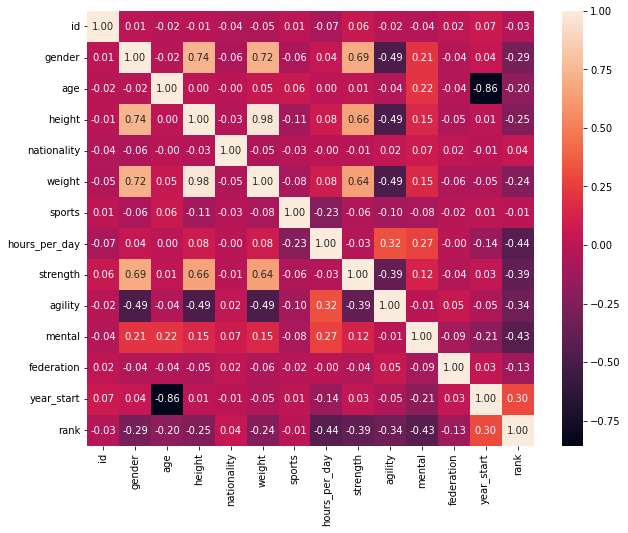

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True, fmt = ".2f")

<Axes: xlabel='mental', ylabel='Density'>

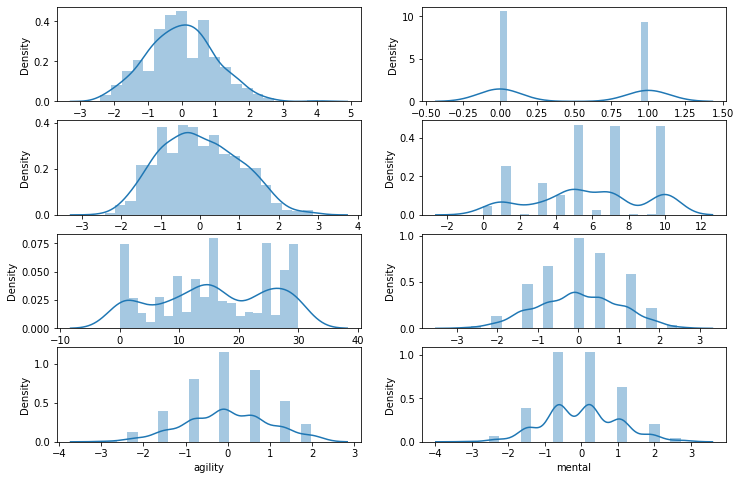

In [ ]:
fig, ax = plt.subplots(4,2, figsize=(12,8))
sns.distplot(df.age, bins = 20, ax=ax[0,0])
sns.distplot(df.gender, bins = 20, ax=ax[0,1])
sns.distplot(df.height, bins = 20, ax=ax[1,0])
sns.distplot(df.nationality, bins = 20, ax=ax[1,1])
sns.distplot(df.sports, bins = 20, ax=ax[2,0])
sns.distplot(df.strength, bins = 20, ax=ax[2,1])
sns.distplot(df.agility, bins = 20, ax=ax[3,0])
sns.distplot(df.mental, bins = 20, ax=ax[3,1])

# **Train Test Split**

In [ ]:
# Split into input (X) and output (Y) variables
X = df.drop(columns=["id","name", "rank"])
y = df["rank"]

# Normalize the input features using standard scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# **Training the Model using Neural Network Models**

In [ ]:
# Define the model
import math as m
from keras.regularizers import l2
model = Sequential()
model.add(Dense(128, input_dim=X.shape[1], activation='tanh',kernel_regularizer=l2(0.001)))
model.add(Dense(64, activation='tanh',kernel_regularizer=l2(0.001)))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])


# Train the model with early stopping and checkpoint saving
callback = [tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss'),
            tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

history = model.fit(X_train, y_train, epochs=1000, validation_split=0.1, batch_size=32)


# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)


print("Mean Squared Error:", mse)
print("Mean Absolute Error: ", mae)
print("RMSE:", m.sqrt(mse))
print("R-squared:", r_squared)

In [ ]:
# Predict on new data
new_data = np.array([[ 0 ,	41,	165.0	,3,	82	,15,	3,	7,	7,	9, 1,	1989 ]])
new_data = scaler.transform(new_data)
predictions = model.predict(new_data)
print("Predicted Data", predictions)

1/1 [==============================] - 0s 23ms/step
Predicted Data [[251.47058]]


# **Using MLP Regressor**

In [ ]:
# Initialize the MLP regressor model
mlp_regressor = MLPRegressor(hidden_layer_sizes=(128, 64),activation='tanh', solver='adam',max_iter=500, random_state=42)

# Train the model on the training set
mlp_regressor.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = mlp_regressor.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
r_squared = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print("RMSE:", rms)
print("R-squared:", r_squared)

Mean Squared Error: 43683.83
Mean Absolute Error: 169.40
RMSE: 209.00677750222337
R-squared: -1.062821396618868


In [ ]:
# Predict on new data
new_data = np.array([[ 0 ,	41,	165.0	,3,	82	,15,	3,	7,	8,	7, 1,	1989	]])
new_data = scaler.transform(new_data)
predictions = mlp_regressor.predict(new_data)
print("Predicted Data", predictions)

Predicted Data [101.54065887]


## **Applying Fuzzy Logic**

In [ ]:
!pip install -U scikit-fuzzy
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [ ]:
# Define the input variables for each attribute
gender = ctrl.Antecedent(np.arange(0, 2, 1), 'gender')
age = ctrl.Antecedent(np.arange(0, 101, 1), 'age')
height = ctrl.Antecedent(np.arange(0, 3.01, 0.01), 'height')
nationality = ctrl.Antecedent(np.arange(0, 2, 1), 'nationality')
weight = ctrl.Antecedent(np.arange(0, 201, 1), 'weight')
sports = ctrl.Antecedent(np.arange(0, 2, 1), 'sports')
hours_per_day = ctrl.Antecedent(np.arange(0, 25, 1), 'hours_per_day')
strength = ctrl.Antecedent(np.arange(0, 101, 1), 'strength')
agility = ctrl.Antecedent(np.arange(0, 101, 1), 'agility')
mental = ctrl.Antecedent(np.arange(0, 101, 1), 'mental')
federation = ctrl.Antecedent(np.arange(0, 2, 1), 'federation')
year_start = ctrl.Antecedent(np.arange(0, 101, 1), 'year_start')
rank = ctrl.Consequent(np.arange(0, 101, 1), 'rank')

In [ ]:
# Define the membership functions for each attribute
gender['Female'] = fuzz.trimf(gender.universe, [0, 0, 1])
gender['Male'] = fuzz.trimf(gender.universe, [0, 1, 1])

age['Young'] = fuzz.trimf(age.universe, [0, 0, 50])
age['Middle-aged'] = fuzz.trimf(age.universe, [30, 50, 70])
age['Old'] = fuzz.trimf(age.universe, [60, 100, 100])

height['Short'] = fuzz.trimf(height.universe, [0, 1, 1.5])
height['Average'] = fuzz.trimf(height.universe, [1, 1.5, 2])
height['Tall'] = fuzz.trimf(height.universe, [1.5, 2, 3])

nationality['Local'] = fuzz.trimf(nationality.universe, [0, 0, 1])
nationality['Foreign'] = fuzz.trimf(nationality.universe, [0, 1, 1])

weight['Lightweight'] = fuzz.trimf(weight.universe, [0, 50, 100])
weight['Middleweight'] = fuzz.trimf(weight.universe, [50, 100, 150])
weight['Heavyweight'] = fuzz.trimf(weight.universe, [100, 150, 200])

sports['Non-athletic'] = fuzz.trimf(sports.universe, [0, 0, 1])
sports['Athletic'] = fuzz.trimf(sports.universe, [0, 1, 1])

hours_per_day['Low'] = fuzz.trimf(hours_per_day.universe, [0, 0, 8])
hours_per_day['Moderate'] = fuzz.trimf(hours_per_day.universe, [4, 12, 20])
hours_per_day['High'] = fuzz.trimf(hours_per_day.universe, [16, 24, 24])

strength['Weak'] = fuzz.trimf(strength.universe, [0, 0, 50])
strength['Moderate'] = fuzz.trimf(strength.universe, [30, 50, 70])
strength['Strong'] = fuzz.trimf(strength.universe, [50, 100, 100])

agility['Low'] = fuzz.trimf(agility.universe, [0, 0, 50])
agility['Moderate'] = fuzz.trimf(agility.universe, [30, 50, 70])
agility['High'] = fuzz.trimf(agility.universe, [50, 100, 100])

mental['Weak'] = fuzz.trimf(mental.universe, [0, 0, 50])
mental['Moderate'] = fuzz.trimf(mental.universe, [30, 50, 70])
mental['Strong'] = fuzz.trimf(mental.universe, [50, 100, 100])

federation['Low'] = fuzz.trimf(federation.universe, [0, 0, 1])
federation['High'] = fuzz.trimf(federation.universe, [0, 1, 1])

year_start['Early'] = fuzz.trimf(year_start.universe, [0, 0, 50])
year_start['Middle'] = fuzz.trimf(year_start.universe, [30, 50, 70])
year_start['Late'] = fuzz.trimf(year_start.universe, [60, 100, 100])

rank['Low'] = fuzz.trimf(rank.universe, [0, 0, 50])
rank['Medium'] = fuzz.trimf(rank.universe, [30, 50, 70])
rank['High'] = fuzz.trimf(rank.universe, [50, 100, 100])

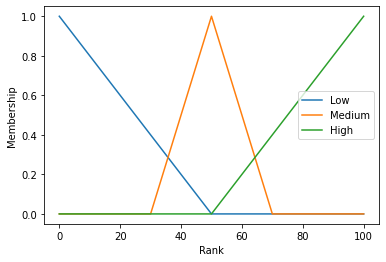

In [ ]:
# Visualize the "rank" variable

# Generate x-axis values for plotting
x_rank = np.arange(0, 101, 1)
# Generate fuzzy membership functions
low = fuzz.trimf(x_rank, [0, 0, 50])
medium = fuzz.trimf(x_rank, [30, 50, 70])
high = fuzz.trimf(x_rank, [50, 100, 100])

plt.plot(x_rank, low, label='Low')
plt.plot(x_rank, medium, label='Medium')
plt.plot(x_rank, high, label='High')
plt.xlabel('Rank')
plt.ylabel('Membership')
plt.legend()
plt.show()

In [ ]:
rule1 = ctrl.Rule(age['Middle-aged']&height['Average']&weight['Middleweight']&hours_per_day['Moderate']&strength['Strong']&agility['High']&mental['Strong']&year_start['Middle'],rank['High'])
rule2 = ctrl.Rule(age['Young']&height['Short']&weight['Lightweight']&hours_per_day['Low']&strength['Weak']&agility['Low']&mental['Weak']&year_start['Early'],rank['Low'])
rule3 = ctrl.Rule(age['Old']&height['Tall']&weight['Heavyweight']&hours_per_day['High']&strength['Strong']&agility['High']&mental['Strong']&year_start['Late'],rank['High'])
rule4 = ctrl.Rule(age['Middle-aged']&height['Average']&weight['Middleweight']&hours_per_day['Moderate']&strength['Strong']&agility['High']&mental['Strong']&year_start['Middle'],rank['High'])
rule5 = ctrl.Rule(age['Young']&height['Average']&weight['Lightweight']&hours_per_day['Moderate']&strength['Moderate']&agility['Moderate']&mental['Moderate']&year_start['Early'],rank['Medium'])
rule6 = ctrl.Rule(age['Old']&height['Tall']&weight['Heavyweight']&hours_per_day['Low']&strength['Weak']&agility['Low']&mental['Weak']&year_start['Late'],rank['Low'])
rule7 = ctrl.Rule(age['Middle-aged']&height['Tall']&weight['Heavyweight']&hours_per_day['High']&strength['Strong']&agility['High']&mental['Strong']&year_start['Middle'],rank['High'])
rule8 = ctrl.Rule(age['Young']&height['Short']&weight['Lightweight']&hours_per_day['Low']&strength['Weak']&agility['Low']&mental['Weak']&year_start['Early'],rank['Low'])
rule9 = ctrl.Rule(age['Old']&height['Average']&weight['Middleweight']&hours_per_day['High']&strength['Moderate']&agility['Moderate']&mental['Moderate']&year_start['Late'],rank['Low'])
rule10 = ctrl.Rule(age['Middle-aged']&height['Tall']&weight['Heavyweight']&hours_per_day['High']&strength['Strong']&agility['High']&mental['Strong']&year_start['Early'],rank['High'])
rule11 = ctrl.Rule(age['Young']&height['Average']&weight['Lightweight']&hours_per_day['Moderate']&strength['Moderate']&agility['Moderate']&mental['Moderate']&year_start['Early'],rank['Medium'])
rule12 = ctrl.Rule(age['Middle-aged']&height['Average']&weight['Middleweight']&hours_per_day['High']&strength['Strong']&agility['High']&mental['Strong']&year_start['Middle'],rank['High'])
rule13 = ctrl.Rule(age['Young']&height['Average']&weight['Middleweight']&hours_per_day['High']&strength['Strong']&agility['Moderate']&mental['Strong']&year_start['Late'],rank['Medium'])

In [ ]:
# Pass inputs to the control system
wrestling_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13])
wrestling = ctrl.ControlSystemSimulation(wrestling_ctrl)

wrestling.input['age'] = 25 # Young
wrestling.input['height'] = 1 # Average
wrestling.input['weight'] = 1 # Middleweight
wrestling.input['hours_per_day'] = 2 # High
wrestling.input['strength'] = 2 # Strong
wrestling.input['agility'] = 1 # Moderate
wrestling.input['mental'] = 2 # Strong
wrestling.input['year_start'] = 2 # Late

# Compute output
wrestling.compute()

# Print output
print(wrestling.output['rank'])


24.750841750841737
